This is a poc aimed to see the benefit and power of using **VAEX** for big datasets

# Imports

In [1]:
import vaex
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
data_path = '/Users/jeremy/data/yellow_taxi_big_data/yellow_taxi_2009_2015_f32.hdf5'

In [3]:
from timeit import default_timer as timer
def time_it(function):
    def wrapper():
        start_time = timer()
        fun = function()
        print('Execution time: {:.4f} seconds'.format(timer() - start_time))
        return fun
    return wrapper

In [4]:
df = vaex.open(data_path)

In [5]:
df.head()

#,vendor_id,pickup_datetime,dropoff_datetime,passenger_count,payment_type,trip_distance,pickup_longitude,pickup_latitude,rate_code,store_and_fwd_flag,dropoff_longitude,dropoff_latitude,fare_amount,surcharge,mta_tax,tip_amount,tolls_amount,total_amount
0,VTS,2009-01-04 02:52:00.000000000,2009-01-04 03:02:00.000000000,1,CASH,2.63,-73.992,40.7216,nan,nan,-73.9938,40.6959,8.9,0.5,nan,0,0,9.4
1,VTS,2009-01-04 03:31:00.000000000,2009-01-04 03:38:00.000000000,3,Credit,4.55,-73.9821,40.7363,nan,nan,-73.9558,40.768,12.1,0.5,nan,2,0,14.6
2,VTS,2009-01-03 15:43:00.000000000,2009-01-03 15:57:00.000000000,5,Credit,10.35,-74.0026,40.7397,nan,nan,-73.87,40.7702,23.7,0,nan,4.74,0,28.44
3,DDS,2009-01-01 20:52:58.000000000,2009-01-01 21:14:00.000000000,1,CREDIT,5,-73.9743,40.791,nan,nan,-73.9966,40.7319,14.9,0.5,nan,3.05,0,18.45
4,DDS,2009-01-24 16:18:23.000000000,2009-01-24 16:24:56.000000000,1,CASH,0.4,-74.0016,40.7194,nan,nan,-74.0084,40.7204,3.7,0,nan,0,0,3.7
5,DDS,2009-01-16 22:35:59.000000000,2009-01-16 22:43:35.000000000,2,CASH,1.2,-73.9898,40.735,nan,nan,-73.985,40.7245,6.1,0.5,nan,0,0,6.6
6,DDS,2009-01-21 08:55:57.000000000,2009-01-21 09:05:42.000000000,1,CREDIT,0.4,-73.984,40.7435,nan,nan,-73.9803,40.7489,5.7,0,nan,1,0,6.7
7,VTS,2009-01-04 04:31:00.000000000,2009-01-04 04:36:00.000000000,1,CASH,1.72,-73.9926,40.7484,nan,nan,-73.9956,40.7283,6.1,0.5,nan,0,0,6.6
8,CMT,2009-01-05 16:29:02.000000000,2009-01-05 16:40:21.000000000,1,Credit,1.6,-73.9697,40.7492,nan,nan,-73.9904,40.7511,8.7,0,nan,1.3,0,10
9,CMT,2009-01-05 18:53:13.000000000,2009-01-05 18:57:45.000000000,1,Cash,0.7,-73.9552,40.783,nan,nan,-73.9586,40.7748,5.9,0,nan,0,0,5.9


In [6]:
df.column_names

['vendor_id',
 'pickup_datetime',
 'dropoff_datetime',
 'passenger_count',
 'payment_type',
 'trip_distance',
 'pickup_longitude',
 'pickup_latitude',
 'rate_code',
 'store_and_fwd_flag',
 'dropoff_longitude',
 'dropoff_latitude',
 'fare_amount',
 'surcharge',
 'mta_tax',
 'tip_amount',
 'tolls_amount',
 'total_amount']

In [7]:
@time_it
def describe():
    return df.describe()

describe()

Execution time: 258.6392 seconds


,vendor_id,pickup_datetime,dropoff_datetime,passenger_count,payment_type,trip_distance,pickup_longitude,pickup_latitude,rate_code,store_and_fwd_flag,dropoff_longitude,dropoff_latitude,fare_amount,surcharge,mta_tax,tip_amount,tolls_amount,total_amount
data_type,large_string,datetime64[ns],datetime64[ns],int64,large_string,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32
count,1173057927,1173057927,1173057927,1173057927,1173057927,1173057927,1173057927,1173057926,1002161871,638914438,1173043432,1173050240,1173057925,1173057925,1032017356,1173057925,1173057925,1173057925
NA,0,0,0,0,0,0,0,1,170896056,534143489,14495,7687,2,2,141040571,2,2,2
mean,--,1970-01-01T00:00:01.953533625,1970-01-01T00:00:14.506598422,1.6844313554517245,--,5.390923660970469,-72.53224844702885,39.93453139351887,1.035820754150404,0.017168377090266976,-72.53741806425015,39.93694872311042,11.217308155800861,0.3036385232379648,0.4963069205116384,1.1294571893021041,0.18678067517757974,13.314765814199541
std,--,62223927139858768.0,62226550658142608.0,1.330321,--,7756.520806,12.750525,9.516751,0.441996,0.129899,12.676822,9.504872,633.505037,0.395407,0.068399,132.842337,886.718093,1098.433815
min,--,2009-01-01T00:00:27.365015552,1899-12-31T23:59:43.370698752,0,--,-40840124.0,-3509.015137,-3579.139404,0.0,0.0,-3579.139404,-3579.139404,-21474808.0,-79.0,-3.0,-1677720.125,-21474836.0,-21474830.0
max,--,2016-01-01T00:00:49.632313344,2253-08-23T08:00:13.061652480,255,--,198623008.0,3570.224121,3577.135498,252.0,2.0,3460.426758,3577.13501,825998.625,999.98999,1311.219971,3950588.75,5510.069824,3950611.5


In [8]:
df.plot_widget(df.pickup_longitude,
               df.pickup_latitude,
               shape = 512,
               limits = 'minmax',
               f='log1p',
               colormap='plasma')

/Users/jeremy/.virtualenvs/vaex_1000_gb_data/lib/python3.7/site-packages/ipykernel_launcher.py:6: DeprecationWarning: Call to deprecated function plot_widget: use df.widget.heatmap
  


Heatmap(children=[ToolsToolbar(interact_value=None, supports_normalize=False, template='<template>\n  <v-toolb…

In [17]:
# Feature Engineering

df['trip_duration_min'] = (df.dropoff_datetime - df.pickup_datetime) / np.timedelta64(1, 'm')
df['trip_speed_mph'] = df.trip_distance / ((df.dropoff_datetime - df.pickup_datetime) / np.timedelta64(1, 'h'))

In [18]:
long_min = -74.05
long_max = -73.75
lat_min = 40.58
lat_max = 40.90

# make a selection based on the boundaries
df_filtered = df[(df.pickup_longitude > long_min) & (df.pickup_longitude < long_max) &\
                (df.pickup_latitude > lat_min) & (df.pickup_latitude < lat_max) &\
                (df.dropoff_longitude > long_min) & (df.dropoff_longitude < long_max) &\
                (df.dropoff_latitude > lat_min) & (df.dropoff_latitude < lat_max)]

[########################################] 100.00% elapsed time  :    46.21s =  0.8m =  0.0h
 

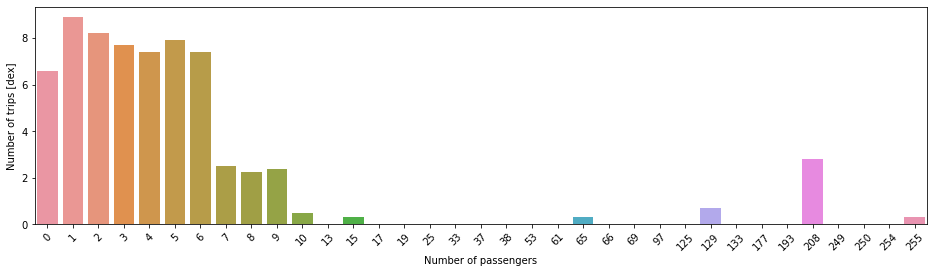

In [19]:
#Get number of unique trips with certain number of passengers
num_passengers = df_filtered.passenger_count.value_counts(progress=True)

# Plot the result
plt.figure(figsize=(16, 4))
sns.barplot(x=num_passengers.index, y=np.log10(num_passengers.values))
plt.xlabel('Number of passengers')
plt.ylabel('Number of trips [dex]')
plt.xticks(rotation='45')
plt.show()

In [20]:
# Filtered based on the number of passengers
df_filtered = df_filtered[(df_filtered.passenger_count>0) & (df_filtered.passenger_count<7)]

/Users/jeremy/.virtualenvs/vaex_1000_gb_data/lib/python3.7/site-packages/vaex/viz/mpl.py:46: UserWarning: `plot1d` is deprecated and it will be removed in version 5.x. Please use `df.viz.histogram` instead.
  warnings.warn('`plot1d` is deprecated and it will be removed in version 5.x. Please use `df.viz.histogram` instead.')


[########################################] 100.00% elapsed time  :     9.26s =  0.2m =  0.0h
 

/Users/jeremy/.virtualenvs/vaex_1000_gb_data/lib/python3.7/site-packages/vaex/viz/mpl.py:143: RuntimeWarning: divide by zero encountered in log10
  fgrid = f(grid)


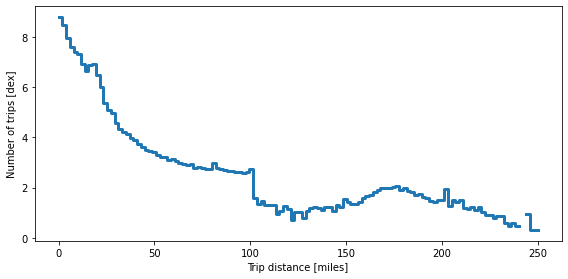

In [21]:
# Plot the distribution of distances.
plt.figure(figsize=(8, 4))
df_filtered.plot1d('trip_distance', limits=[0, 250], f='log10', shape=128, lw=3, progress=True)
plt.xlabel('Trip distance [miles]')
plt.ylabel('Number of trips [dex]')
plt.show()

In [22]:
# What is the largest distance?
max_trip_distance = df_filtered.trip_distance.max().astype('int')

print(f'The largest distance in the data is {max_trip_distance} miles')

The largest distance in the data is 198623008 miles


In [23]:
df_filtered = df_filtered[(df_filtered.trip_distance > 0) & (df_filtered.trip_distance < 100) ]

/Users/jeremy/.virtualenvs/vaex_1000_gb_data/lib/python3.7/site-packages/vaex/viz/mpl.py:46: UserWarning: `plot1d` is deprecated and it will be removed in version 5.x. Please use `df.viz.histogram` instead.
  warnings.warn('`plot1d` is deprecated and it will be removed in version 5.x. Please use `df.viz.histogram` instead.')


[########################################] 100.00% elapsed time  :    32.96s =  0.5m =  0.0h
 

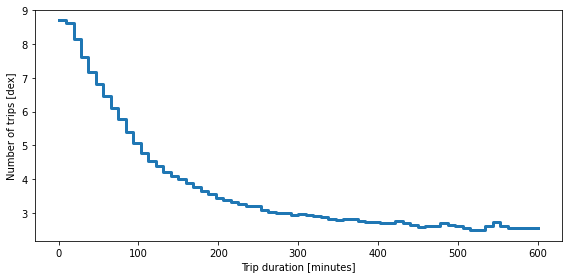

In [24]:
# Plot the distribution of trip durations
plt.figure(figsize=(8, 4))
df_filtered.plot1d('trip_duration_min', limits=[0, 600], f='log10', shape=64, lw=3, progress=True)
plt.xlabel('Trip duration [minutes]')
plt.ylabel('Number of trips [dex]')
plt.show()